# Initialization

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from result_saver import SaverProvider

provider = SaverProvider()

# Initialize simulator

In [43]:
from soft_info import RepCodeIQSimulator

DEVICE = 'ibm_sherbrooke'
DISTANCE = 7
ROUNDS = 7
OTHER_DATE = '2021-11-11'
_RESETS = True
LOGICAL = 0 # NOT NEEDED FOR EXTREME IQ BCS HARDCODED 0

_is_hex = True
if DEVICE == 'ibmq_mumbai':
    _is_hex = False

# Initialize simulator
simulator = RepCodeIQSimulator(provider, DISTANCE, ROUNDS, DEVICE, _is_hex=_is_hex, _resets = _RESETS, other_date=OTHER_DATE)

Found jobs for backend ibm_sherbrooke with closest execution date 2023-10-27 08:32:22.841567+00:00.
Found jobs for backend ibm_sherbrooke with closest execution date 2023-10-27 08:32:22.841567+00:00.
Searching for ibm_sherbrooke and 23.10.27_07h46_300pts_2std


# Get IQ data

In [47]:
SHOTS = int(1e4)
NOISE_LIST = [3e-2, 0.8e-2, 1e-2, 3e-2] # [two-qubit-fidelity, reset error, measurement error, idle error]
# NOISE_LIST = None
P_AMBIG = 0.3

IQ_data = simulator.generate_IQ(SHOTS, noise_list=NOISE_LIST)
IQ_data_extreme = simulator.generate_extreme_IQ(SHOTS, P_AMBIG, noise_list=NOISE_LIST)

100%|██████████| 8869/8869 [00:03<00:00, 2789.71it/s]


# Decode IQ data

In [48]:
import pymatching
import stim

model = simulator.stim_circ.detector_error_model(decompose_errors=True)
matching = pymatching.Matching.from_detector_error_model(model)

In [49]:
import cpp_soft_info

_DETAILED = True

matching = pymatching.Matching.from_detector_error_model(model)
result = cpp_soft_info.decode_IQ_shots(matching._matching_graph, IQ_data,
                                           ROUNDS, int(LOGICAL), _RESETS, simulator.qubit_mapping, simulator.grid_dict,
                                           simulator.processed_scaler_dict, p_data=-1, p_mixed=-1,
                                           common_measure=-1, _adv_probs=not _RESETS, _bimodal=_RESETS, merge_strategy = "replace", _detailed=_DETAILED,
                                            p_offset = 1, p_multiplicator = 1, _ntnn_edges = False)

matching = pymatching.Matching.from_detector_error_model(model)
result_extreme = cpp_soft_info.decode_IQ_shots(matching._matching_graph, IQ_data_extreme,
                                             ROUNDS, int(LOGICAL), _RESETS, simulator.qubit_mapping, simulator.grid_dict,
                                             simulator.processed_scaler_dict, p_data=-1, p_mixed=-1,
                                             common_measure=-1, _adv_probs=not _RESETS, _bimodal=_RESETS, merge_strategy = "replace", _detailed=_DETAILED,
                                              p_offset = 1, p_multiplicator = 1, _ntnn_edges = True)

print("num_errors:", result.num_errors, "out of", len(IQ_data), "shots for _RESETS =", _RESETS)
print("num_errors EXTREME:", result_extreme.num_errors, "out of", len(IQ_data_extreme), "shots for _RESETS =", _RESETS)

num_errors: 116 out of 10000 shots for _RESETS = True
num_errors EXTREME: 202 out of 10000 shots for _RESETS = True


In [50]:
p_meas = -1
# p_meas = 20e-2 

matching = pymatching.Matching.from_detector_error_model(model)
result_informed = cpp_soft_info.decode_IQ_shots_flat_informed(matching._matching_graph, IQ_data[:],
                                           ROUNDS, int(LOGICAL), _RESETS, simulator.qubit_mapping, simulator.grid_dict, simulator.processed_scaler_dict,
                                           p_data = -1, p_mixed = -1, p_meas = p_meas, common_measure=-1, _detailed=_DETAILED)

matching = pymatching.Matching.from_detector_error_model(model)
result_informed_extreme = cpp_soft_info.decode_IQ_shots_flat_informed(matching._matching_graph, IQ_data_extreme[:],
                                             ROUNDS, int(LOGICAL), _RESETS, simulator.qubit_mapping, simulator.grid_dict, simulator.processed_scaler_dict,
                                             p_data = -1, p_mixed = -1, p_meas = p_meas, common_measure=-1, _detailed=_DETAILED)

print("num_errors:", result_informed.num_errors, "out of", len(IQ_data), "shots for _RESETS =", _RESETS)
print("num_errors EXTREME:", result_informed_extreme.num_errors, "out of", len(IQ_data_extreme), "shots for _RESETS =", _RESETS)
         
# takes 1s

num_errors: 128 out of 10000 shots for _RESETS = True
num_errors EXTREME: 2801 out of 10000 shots for _RESETS = True


In [51]:
matching = pymatching.Matching.from_detector_error_model(model)
result_flat = cpp_soft_info.decode_IQ_shots_flat(matching._matching_graph, IQ_data,
                                           ROUNDS, int(LOGICAL), _RESETS, simulator.qubit_mapping, simulator.grid_dict,
                                           simulator.processed_scaler_dict, _detailed=_DETAILED)

matching = pymatching.Matching.from_detector_error_model(model)
result_flat_extreme = cpp_soft_info.decode_IQ_shots_flat(matching._matching_graph, IQ_data_extreme,
                                                         ROUNDS, int(LOGICAL), _RESETS, simulator.qubit_mapping, simulator.grid_dict,
                                                            simulator.processed_scaler_dict, _detailed=_DETAILED)

print("num_errors:", result_flat.num_errors, "out of", len(IQ_data), "shots for _RESETS =", _RESETS)
print("num_errors EXTREME:", result_flat_extreme.num_errors, "out of", len(IQ_data_extreme), "shots for _RESETS =", _RESETS)

num_errors: 140 out of 10000 shots for _RESETS = True
num_errors EXTREME: 2730 out of 10000 shots for _RESETS = True


# Plot the results

In [41]:
print("\nIQ:", result.indices, "\nFlat:", result_flat.indices, "\nInformed", result_informed.indices)
print("\nIQ EXTREME:", result_extreme.indices, "\nFlat EXTREME:", result_flat_extreme.indices, "\nInformed EXTREME", result_informed_extreme.indices)


IQ: [] 
Flat: [] 
Informed []

IQ EXTREME: [] 
Flat EXTREME: [2, 7, 8, 11, 15, 18, 23, 25, 26, 29, 34, 36, 37, 41, 46, 49, 53, 55, 58, 60, 75, 76, 77, 83, 84, 87, 89, 91, 94, 96, 99, 102, 103, 110, 112, 118, 127, 133, 140, 142, 149, 154, 159, 162, 170, 172, 174, 176, 185, 192, 198, 200, 205, 206, 210, 218, 222, 223, 224, 226, 227, 229, 231, 234, 235, 236, 239, 245, 248, 254, 258, 259, 260, 263, 270, 273, 277, 281, 282, 285, 290, 293, 296, 299, 306, 308, 311, 312, 316, 318, 319, 322, 326, 327, 328, 329, 332, 334, 335, 337, 342, 344, 345, 346, 347, 349, 351, 353, 359, 361, 362, 365, 368, 369, 372, 379, 380, 381, 388, 390, 396, 398, 403, 406, 411, 414, 416, 420, 425, 427, 431, 438, 439, 441, 443, 446, 448, 451, 452, 454, 456, 458, 466, 472, 473, 485, 491, 494, 495, 513, 517, 521, 522, 524, 535, 538, 547, 549, 556, 561, 564, 567, 574, 586, 587, 588, 589, 590, 591, 592, 594, 598, 600, 602, 605, 613, 614, 618, 621, 622, 623, 624, 629, 632, 635, 637, 646, 647, 651, 659, 661, 662, 663, 665, 6

-----IQ True decoding -----


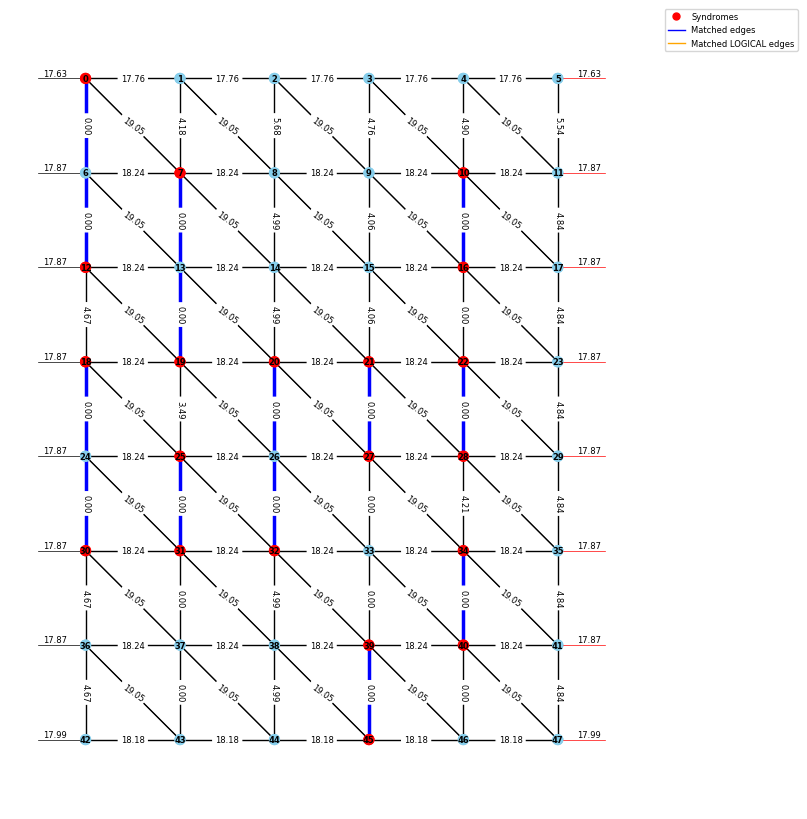

-----flat True decoding-----


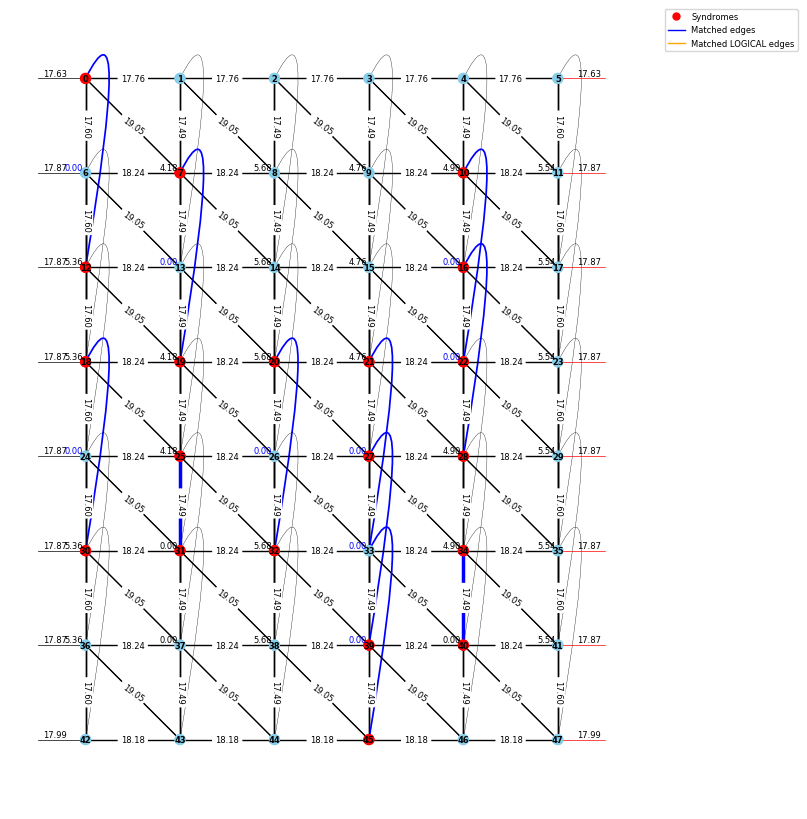

-----INFORMED True decoding-----


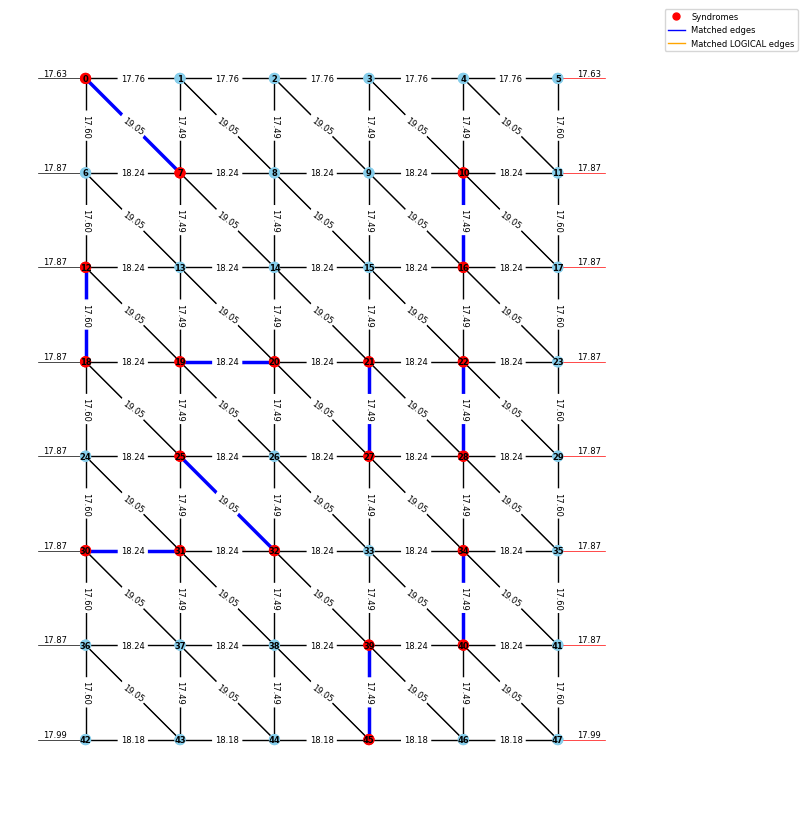

In [42]:
from soft_info import draw_matching_graph


index = 1

fig_size = (4, 13)
fig_size = (8, 8)
scale_factor = 0.5

to_be_result = result
details = to_be_result.error_details[index]
print(f"-----IQ {bool(not (index in to_be_result.indices))} decoding -----")
draw_matching_graph(matching=None, d=DISTANCE, T=ROUNDS, syndromes=details.detection_syndromes,
                        matched_edges=details.matched_edges, figsize=fig_size, scale_factor=scale_factor, edge_list=details.edges)

to_be_result = result_extreme
details = to_be_result.error_details[index]
print(f"-----flat {bool(not (index in to_be_result.indices))} decoding-----")
draw_matching_graph(matching=None, d=DISTANCE, T=ROUNDS, syndromes=details.detection_syndromes,
                        matched_edges=details.matched_edges, figsize=fig_size, scale_factor=scale_factor, edge_list=details.edges)

to_be_result = result_informed_extreme
details = to_be_result.error_details[index]
print(f"-----INFORMED {bool(not (index in to_be_result.indices))} decoding-----")
draw_matching_graph(matching=None, d=DISTANCE, T=ROUNDS, syndromes=details.detection_syndromes,
                        matched_edges=details.matched_edges, figsize=fig_size, scale_factor=scale_factor, edge_list=details.edges)


In [11]:
informed_not_in_iq = sorted(set(result_informed.indices) - set(result.indices))
print("indices that are in informed but not in IQ with len:", len(informed_not_in_iq))
print(informed_not_in_iq)
iq_not_in_informed = sorted(set(result.indices) - set(result_informed.indices))
print("indices that are in IQ but not in informed with len:", len(iq_not_in_informed))
print(iq_not_in_informed)

print()

iq_not_in_flat = sorted(set(result.indices) - set(result_flat.indices))
print("indices that are in IQ but not in flat with len:", len(iq_not_in_flat))
print(iq_not_in_flat)
flat_not_in_iq = sorted(set(result_flat.indices) - set(result.indices))
print("indices that are in flat but not in IQ with len:", len(flat_not_in_iq))
print(flat_not_in_iq)

indices that are in informed but not in IQ with len: 180
[55, 470, 559, 675, 682, 706, 760, 777, 806, 871, 956, 998, 1168, 1449, 1475, 1639, 1655, 1733, 1759, 1800, 1805, 1831, 1949, 2081, 2100, 2182, 2216, 2302, 2318, 2365, 2366, 2438, 2585, 2591, 2666, 2678, 2751, 2787, 2803, 2818, 2834, 2865, 2899, 2912, 2938, 2991, 3027, 3173, 3290, 3468, 3486, 3500, 3585, 3598, 3656, 3746, 3836, 4027, 4058, 4059, 4193, 4199, 4201, 4223, 4299, 4386, 4393, 4582, 4614, 4661, 4777, 4790, 4813, 4816, 4910, 4949, 5046, 5051, 5065, 5318, 5476, 5520, 5522, 5529, 5590, 5607, 5636, 5775, 5808, 5833, 5861, 5999, 6041, 6114, 6176, 6205, 6218, 6339, 6369, 6370, 6515, 6550, 6595, 6642, 6686, 6747, 6754, 6804, 6945, 7042, 7080, 7127, 7150, 7203, 7274, 7289, 7306, 7355, 7372, 7398, 7416, 7491, 7511, 7548, 7572, 7681, 7831, 7840, 8001, 8004, 8045, 8077, 8108, 8112, 8143, 8168, 8244, 8247, 8283, 8315, 8362, 8364, 8394, 8499, 8511, 8514, 8631, 8726, 8741, 8748, 8764, 8820, 8856, 8881, 8905, 8948, 8989, 9007, 9089, 9

# Analyse specific shots

{'0000000 000010 000000 000000 001000 000000 000000 000000': 1}


100%|██████████| 169/169 [00:00<00:00, 2286572.18it/s]

mean time edge weight: 3.4590393702189126

[(4, 16), (27, 15), (18, 30), (21, 33), (24, 25), (26, 38), (46, 45), (47, 35), (46, 47), (34, 41), (36, -1), (42, -1)]
-----IQ-----


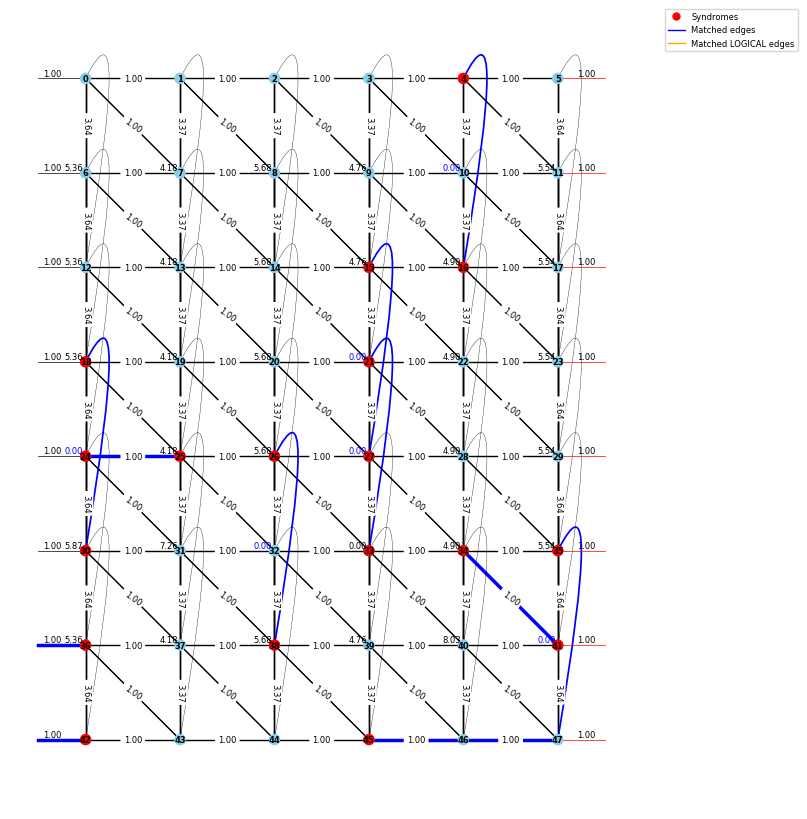

In [12]:
from tqdm import tqdm

index = 83
IQ_data_new = IQ_data[index:index+1]

esult = cpp_soft_info.decode_IQ_shots(matching._matching_graph, IQ_data_extreme,
                                             ROUNDS, int(LOGICAL), _RESETS, simulator.qubit_mapping, simulator.grid_dict,
                                             simulator.processed_scaler_dict, p_data=-1, p_mixed=-1,
                                             common_measure=-1, _adv_probs=not _RESETS, _bimodal=_RESETS, merge_strategy = "replace", _detailed=_DETAILED,
                                              p_offset = 1, p_multiplicator = 1, _ntnn_edges = True)

print(cpp_soft_info.get_counts(IQ_data_new, simulator.qubit_mapping, simulator.grid_dict, simulator.processed_scaler_dict, ROUNDS))



to_be_result = esult
details = to_be_result.error_details[0]


mean_edge_weight = 0
num_time_edges = 0
for edge in tqdm(matching.edges()):
    src_node, tgt_node, data = edge
    if src_node == None or tgt_node == None:
        continue
    if src_node == tgt_node - (DISTANCE-1):
        mean_edge_weight += data["weight"]
        num_time_edges += 1

print("mean time edge weight:", mean_edge_weight / num_time_edges)

print()
print(details.matched_edges)

print("-----IQ-----")
draw_matching_graph(matching=None, d=DISTANCE, T=ROUNDS, syndromes=details.detection_syndromes,
                        matched_edges=details.matched_edges, figsize=fig_size, scale_factor=scale_factor, edge_list=details.edges)